In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import requests
import json
import geopandas as gpd

# WeGo Public Transit

[WeGo Public Transit](https://www.wegotransit.com/) is a public transit system serving the Greater Nashville
and Davidson County area. WeGo provides local and regional bus routes, the WeGo Star train service connecting
Lebanon to downtown Nashville, along with several other transit services.

In this project, your goal will be to analyze data from WeGo's bus routes and attempt to identify intersections
and other locations which experience frequent delays. This analysis can look by route, by direction of travel,
and by day or day of the week.

You can also consider time of day in your investigation (for example, comparing
the AM and PM rush on Monday through Friday).

You can obtain the data for this project through Swiftly. You will be provided with an API key to  access this data.
The API that you will be using is the [Speed Map API](https://swiftly-inc.stoplight.io/docs/standalone/573bc3fb95867-speed-map),
which provides average speed information for a single route and direction over a given date range.

Note that the API can return either speed data at the stop segment level or return high resolution data,
which provides information for stop segments of approximately 25 meters along with more detailed speed and duration information.

Please take the time to carefully read the API documentation so that you are familiar with the query parameter option
and understand the response data.

You can get more information about these routes, such as route numbers and stop information,
using the [Agency Routes API](https://swiftly-inc.stoplight.io/docs/standalone/5c0bd000bb0f2-agency-routes).
A user-friendly map showing all routes is available at https://www.wegotransit.com/ride/maps-schedules/bus/. 

If time allows, investigate all routes, but start with the high ridership and frequent routes:
* 3: West End
* 7: Hillsboro
* 22: Bordeaux
* 23: Dickerson Pike
* 50: Charlotte Pike
* 52: Nolensville Pike
* 55: Murfreesboro Pike
* 56: Gallatin Pike

Bottlenecks - constant/irregular
(constant)
*ignoring bus stop sections
Finding downtown vs suburbs bottlenecks
1st Quartile of each route for constant
*Delayed data

Focus on Inbound/Outbound
(inbound)

Time categories -
(6am - 9am AM Peak)
9am-230pm Off Peak
230pm-6pm PM Peak
6pm-6am Overnight
Day of Interest
Saturday
Sunday
Holidays*
(M/F)
(Tues-Thurs)
(5/25-7/26)
(1/25-5/24)


# API access
Agency Info: agency_details, routes, schedule

Speed-map: Check all, speed-map



In [2]:
with open('../data/WeGo.json') as fi:
    credentials = json.load(fi)

In [3]:
Authorization = credentials['Authorization']

In [4]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params_geo3 = {
    'direction': '1',
    'startDate': '01-07-2022',
    'endDate': '01-26-2022',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime': '06:00',
    'endTime': '09:00',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'format': 'geojson',
    'resolution': 'hiRes'
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

response_geo3 = requests.get(URL, params = params_geo3, headers = headers)
response_geo3

# dig into json to get list of line-segment dicts
segments3 = response_geo3.json()['features']

# convert to GeoDataFrame the quick way
fullweekgeo = gpd.GeoDataFrame.from_features(segments3)

fullweekgeo

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs
0,"LINESTRING (-86.83200 36.15252, -86.83173 36.1...",CHA39AEF,Charlotte Ave & 39th Ave N Eb,CXISYLHE,37th Ave/Sylvan Heights Station Inbound,24.375,2.231447,10.923405,8.239,3.897,2.448,2.011,1.7280,1.518,1.384,0.793
1,"LINESTRING (-86.86416 36.14888, -86.86390 36.1...",CHABALEF,Charlotte Ave & Balmy Ave Eb,CHALELEM,Charlotte Pike & Lellyett St Eb,23.507,1.572418,14.949587,5.316,1.785,1.630,1.565,1.4770,1.387,1.211,1.045
2,"LINESTRING (-86.79194 36.16148, -86.79169 36.1...",CXI17AVE,17th Ave Station Inbound,CXINGULC,11th Ave / N Gulch Station Inbound,24.691,2.690915,9.175689,67.427,2.915,2.610,2.384,2.0850,1.942,1.734,1.416
3,"LINESTRING (-86.84193 36.15216, -86.84166 36.1...",CXIRICHL,46th Ave/Richland Park Station Inbound,CXISYLPA,42nd Ave/Sylvan Park Station Inbound,24.527,2.614232,9.382105,6.136,4.145,3.479,2.834,2.2785,1.982,1.650,1.295
4,"LINESTRING (-86.87277 36.14445, -86.87258 36.1...",PREWILNN,Premier Dr & Wilclay Dr Nb,CXIAMERI,American Station Inbound,24.433,4.805865,5.083996,21.212,8.809,6.848,5.574,3.5820,3.144,2.499,2.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.500113,9.864354,6.327,3.639,3.066,2.735,2.2935,2.007,1.715,1.432
563,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,2.003176,12.061347,9.912,2.795,2.297,1.957,1.7130,1.618,1.456,1.143
564,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,7.256858,3.344423,91.682,17.716,12.218,5.432,2.5470,2.008,1.625,1.118
565,"LINESTRING (-86.88379 36.14136, -86.88404 36.1...",ANNCHAWM,Annex Ave & Charlotte Pike Wb,PREWILNN,Premier Dr & Wilclay Dr Nb,24.837,3.958376,6.274543,13.842,5.128,4.470,3.944,3.4710,3.126,2.870,1.959


In [5]:
response_geo3.json()

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'LineString',
    'coordinates': [[-86.83199879755577, 36.152519982912054],
     [-86.83172759511154, 36.152529965824115]]},
   'properties': {'fromStopId': 'CHA39AEF',
    'fromStopName': 'Charlotte Ave & 39th Ave N Eb',
    'toStopId': 'CXISYLHE',
    'toStopName': '37th Ave/Sylvan Heights Station Inbound',
    'pathLengthMeters': 24.375,
    'averageTravelSeconds': 2.231447,
    'averageTravelSpeed': 10.923405306063733,
    'maxSecs': 8.239,
    'percent90Secs': 3.897,
    'percent80Secs': 2.448,
    'percent70Secs': 2.011,
    'medianSecs': 1.728,
    'percent30Secs': 1.518,
    'percent10Secs': 1.384,
    'minSecs': 0.793}},
  {'type': 'Feature',
   'geometry': {'type': 'LineString',
    'coordinates': [[-86.86415649838675, 36.148882738105655],
     [-86.86390045747015, 36.14892685002387]]},
   'properties': {'fromStopId': 'CHABALEF',
    'fromStopName': 'Charlotte Ave & Balmy Ave Eb',
    'toS

In [6]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params_geo1 = {
    'direction': '1',
    'startDate': '01-07-2022',
    'endDate': '01-26-2022',
    'daysOfWeek': '2,3,4',
    'beginTime': '06:00',
    'endTime': '09:00',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'format': 'geojson',
    'resolution': 'hiRes'
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

response_geo1 = requests.get(URL, params = params_geo1, headers = headers)
response_geo1

# dig into json to get list of line-segment dicts
segments1 = response_geo1.json()['features']

# convert to GeoDataFrame the quick way
twtgeo = gpd.GeoDataFrame.from_features(segments1)

In [7]:
twtgeo.shape

(566, 16)

In [8]:
twtgeo

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs
0,"LINESTRING (-86.83200 36.15252, -86.83173 36.1...",CHA39AEF,Charlotte Ave & 39th Ave N Eb,CXISYLHE,37th Ave/Sylvan Heights Station Inbound,24.375,2.258344,10.793307,8.239,4.567,2.643,1.975,1.6735,1.502,1.363,0.793
1,"LINESTRING (-86.86416 36.14888, -86.86390 36.1...",CHABALEF,Charlotte Ave & Balmy Ave Eb,CHALELEM,Charlotte Pike & Lellyett St Eb,23.507,1.587209,14.810274,5.316,1.826,1.651,1.611,1.5025,1.395,1.236,1.045
2,"LINESTRING (-86.79194 36.16148, -86.79169 36.1...",CXI17AVE,17th Ave Station Inbound,CXINGULC,11th Ave / N Gulch Station Inbound,24.691,2.945911,8.381448,67.427,2.921,2.615,2.358,2.0870,1.949,1.735,1.416
3,"LINESTRING (-86.84193 36.15216, -86.84166 36.1...",CXIRICHL,46th Ave/Richland Park Station Inbound,CXISYLPA,42nd Ave/Sylvan Park Station Inbound,24.527,2.691044,9.114307,6.136,4.244,3.613,2.936,2.3520,2.018,1.650,1.483
4,"LINESTRING (-86.87277 36.14445, -86.87258 36.1...",PREWILNN,Premier Dr & Wilclay Dr Nb,CXIAMERI,American Station Inbound,24.433,5.021161,4.866006,21.212,9.409,7.779,5.877,3.6970,3.080,2.530,2.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.425516,10.167733,4.203,3.574,2.810,2.664,2.3340,2.013,1.746,1.442
562,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,2.028543,11.910519,9.912,2.747,2.305,1.964,1.7160,1.627,1.503,1.143
563,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,6.851659,3.542208,46.310,17.132,14.297,5.440,2.5670,2.131,1.587,1.325
564,"LINESTRING (-86.83597 36.15238, -86.83570 36.1...",CXISYLPA,42nd Ave/Sylvan Park Station Inbound,CHA39AEF,Charlotte Ave & 39th Ave N Eb,23.766,3.841839,6.186100,7.960,5.986,5.305,4.549,3.6050,2.836,2.060,1.168


In [9]:
#rt50geo['data']['segments'][3:4]

In [10]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params_geo2 = {
    'direction': '1',
    'startDate': '01-07-2022',
    'endDate': '01-26-2022',
    'daysOfWeek': '1,5',
    'beginTime': '06:00',
    'endTime': '09:00',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'format': 'geojson',
    'resolution': 'hiRes'
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

response_geo2 = requests.get(URL, params = params_geo2, headers = headers)
response_geo2

# dig into json to get list of line-segment dicts
segments2 = response_geo2.json()['features']

# convert to GeoDataFrame the quick way
mfgeo = gpd.GeoDataFrame.from_features(segments2)

In [11]:
mfgeo.shape

(567, 16)

In [12]:
mfgeo

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs
0,"LINESTRING (-86.83200 36.15252, -86.83173 36.1...",CHA39AEF,Charlotte Ave & 39th Ave N Eb,CXISYLHE,37th Ave/Sylvan Heights Station Inbound,24.375,2.183980,11.160816,7.684,3.377,2.405,2.101,1.7630,1.540,1.415,1.298
1,"LINESTRING (-86.86416 36.14888, -86.86390 36.1...",CHABALEF,Charlotte Ave & Balmy Ave Eb,CHALELEM,Charlotte Pike & Lellyett St Eb,23.507,1.545917,15.205862,5.059,1.711,1.575,1.529,1.4510,1.371,1.185,1.095
2,"LINESTRING (-86.79194 36.16148, -86.79169 36.1...",CXI17AVE,17th Ave Station Inbound,CXINGULC,11th Ave / N Gulch Station Inbound,24.691,2.240922,11.018233,5.832,2.871,2.628,2.429,2.0750,1.933,1.725,1.555
3,"LINESTRING (-86.84193 36.15216, -86.84166 36.1...",CXIRICHL,46th Ave/Richland Park Station Inbound,CXISYLPA,42nd Ave/Sylvan Park Station Inbound,24.527,2.477176,9.901194,5.198,4.028,2.964,2.683,2.2120,1.878,1.625,1.295
4,"LINESTRING (-86.87277 36.14445, -86.87258 36.1...",PREWILNN,Premier Dr & Wilclay Dr Nb,CXIAMERI,American Station Inbound,24.433,4.388729,5.567215,17.711,7.532,5.681,4.354,3.5265,3.163,2.485,2.067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.641694,9.335676,6.327,3.810,3.413,3.121,2.2530,1.919,1.679,1.432
563,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,1.956500,12.349093,4.182,3.109,2.267,1.942,1.6990,1.617,1.412,1.253
564,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,7.994320,3.035905,91.682,18.558,9.081,5.452,2.2570,1.972,1.745,1.118
565,"LINESTRING (-86.88379 36.14136, -86.88404 36.1...",ANNCHAWM,Annex Ave & Charlotte Pike Wb,PREWILNN,Premier Dr & Wilclay Dr Nb,24.837,3.740563,6.639910,9.398,4.825,4.390,3.874,3.4390,3.201,2.950,2.012


In [13]:
mtwtf = pd.concat([mfgeo, twtgeo])

In [14]:
mtwtf

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs
0,"LINESTRING (-86.83200 36.15252, -86.83173 36.1...",CHA39AEF,Charlotte Ave & 39th Ave N Eb,CXISYLHE,37th Ave/Sylvan Heights Station Inbound,24.375,2.183980,11.160816,7.684,3.377,2.405,2.101,1.7630,1.540,1.415,1.298
1,"LINESTRING (-86.86416 36.14888, -86.86390 36.1...",CHABALEF,Charlotte Ave & Balmy Ave Eb,CHALELEM,Charlotte Pike & Lellyett St Eb,23.507,1.545917,15.205862,5.059,1.711,1.575,1.529,1.4510,1.371,1.185,1.095
2,"LINESTRING (-86.79194 36.16148, -86.79169 36.1...",CXI17AVE,17th Ave Station Inbound,CXINGULC,11th Ave / N Gulch Station Inbound,24.691,2.240922,11.018233,5.832,2.871,2.628,2.429,2.0750,1.933,1.725,1.555
3,"LINESTRING (-86.84193 36.15216, -86.84166 36.1...",CXIRICHL,46th Ave/Richland Park Station Inbound,CXISYLPA,42nd Ave/Sylvan Park Station Inbound,24.527,2.477176,9.901194,5.198,4.028,2.964,2.683,2.2120,1.878,1.625,1.295
4,"LINESTRING (-86.87277 36.14445, -86.87258 36.1...",PREWILNN,Premier Dr & Wilclay Dr Nb,CXIAMERI,American Station Inbound,24.433,4.388729,5.567215,17.711,7.532,5.681,4.354,3.5265,3.163,2.485,2.067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.425516,10.167733,4.203,3.574,2.810,2.664,2.3340,2.013,1.746,1.442
562,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,2.028543,11.910519,9.912,2.747,2.305,1.964,1.7160,1.627,1.503,1.143
563,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,6.851659,3.542208,46.310,17.132,14.297,5.440,2.5670,2.131,1.587,1.325
564,"LINESTRING (-86.83597 36.15238, -86.83570 36.1...",CXISYLPA,42nd Ave/Sylvan Park Station Inbound,CHA39AEF,Charlotte Ave & 39th Ave N Eb,23.766,3.841839,6.186100,7.960,5.986,5.305,4.549,3.6050,2.836,2.060,1.168


In [15]:
type(mtwtf)

geopandas.geodataframe.GeoDataFrame

In [16]:
def concat_frames(geo_response, response):
    """This function pulls in two API requests, puts one in a geodataframe the other in a dataframe and concats desired columns"""
    geo_df = gpd.GeoDataFrame.from_features(geo_response.json()['features'])
    res_df = pd.DataFrame(response.json()['data']['segments'])
    full_df = pd.concat([geo_df, res_df[['countForSegment', 'percent20Secs']]], axis = 1)
    return full_df

In [17]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '1',
    'startDate': '01-25-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,5',
    'endDate' : '02-24-2022',
    'endTime' : '09:00',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '1',
    'startDate': '01-25-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,5',
    'endDate' : '02-24-2022',
    'endTime' : '09:00',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [18]:
janfebm = concat_frames(requests.get(URL, params = params, headers = headers), requests.get(URL, params = params1, headers = headers))

In [19]:
janfebm = janfebm[janfebm['countForSegment'] > 40]

In [20]:
type(janfebm)

geopandas.geodataframe.GeoDataFrame

In [21]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '1',
    'startDate': '02-25-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,5',
    'endDate' : '03-26-2022',
    'endTime' : '09:00',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '1',
    'startDate': '02-25-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,5',
    'endDate' : '03-26-2022',
    'endTime' : '09:00',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [22]:
febmarm = concat_frames(requests.get(URL, params = params, headers = headers), requests.get(URL, params = params1, headers = headers))

In [23]:
febmarm

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
0,"LINESTRING (-86.83200 36.15252, -86.83173 36.1...",CHA39AEF,Charlotte Ave & 39th Ave N Eb,CXISYLHE,37th Ave/Sylvan Heights Station Inbound,24.375,2.453259,9.935763,7.836,5.515,2.980,2.056,1.7230,1.571,1.453,1.273,81,1.500
1,"LINESTRING (-86.86416 36.14888, -86.86390 36.1...",CHABALEF,Charlotte Ave & Balmy Ave Eb,CHALELEM,Charlotte Pike & Lellyett St Eb,23.507,1.548089,15.184528,7.156,1.729,1.671,1.576,1.4510,1.357,1.225,1.006,79,1.312
2,"LINESTRING (-86.79194 36.16148, -86.79169 36.1...",CXI17AVE,17th Ave Station Inbound,CXINGULC,11th Ave / N Gulch Station Inbound,24.691,2.210000,11.172398,3.425,2.845,2.579,2.312,2.1500,1.907,1.731,1.446,79,1.807
3,"LINESTRING (-86.84193 36.15216, -86.84166 36.1...",CXIRICHL,46th Ave/Richland Park Station Inbound,CXISYLPA,42nd Ave/Sylvan Park Station Inbound,24.527,2.768756,8.858491,8.830,4.713,3.537,2.867,2.2880,2.034,1.780,1.350,82,1.925
4,"LINESTRING (-86.87277 36.14445, -86.87258 36.1...",PREWILNN,Premier Dr & Wilclay Dr Nb,CXIAMERI,American Station Inbound,24.433,4.256667,5.739937,22.778,6.464,5.227,4.117,3.3950,3.122,2.586,1.577,81,2.993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.735338,9.016070,5.381,3.858,3.466,3.055,2.5905,2.190,1.726,0.921,80,2.031
563,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,1.916370,12.607691,3.125,2.701,2.251,2.002,1.8630,1.597,1.458,1.221,81,1.557
564,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,7.002451,3.465929,50.733,21.896,10.527,5.286,2.1805,1.820,1.590,1.227,82,1.697
565,"LINESTRING (-86.83597 36.15238, -86.83570 36.1...",CXISYLPA,42nd Ave/Sylvan Park Station Inbound,CHA39AEF,Charlotte Ave & 39th Ave N Eb,23.766,3.856805,6.162095,10.443,6.266,5.287,4.422,3.4565,2.662,2.136,1.819,82,2.440


In [24]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '1',
    'startDate': '03-27-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,5',
    'endDate' : '04-26-2022',
    'endTime' : '09:00',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '1',
    'startDate': '03-27-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,5',
    'endDate' : '04-26-2022',
    'endTime' : '09:00',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [25]:
maraprm = concat_frames(requests.get(URL, params = params, headers = headers), requests.get(URL, params = params1, headers = headers))

In [26]:
maraprm

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
0,"LINESTRING (-86.83200 36.15252, -86.83173 36.1...",CHA39AEF,Charlotte Ave & 39th Ave N Eb,CXISYLHE,37th Ave/Sylvan Heights Station Inbound,24.375,2.860362,8.521649,8.334,6.112,4.568,3.401,1.7790,1.546,1.414,0.879,94,1.477
1,"LINESTRING (-86.86416 36.14888, -86.86390 36.1...",CHABALEF,Charlotte Ave & Balmy Ave Eb,CHALELEM,Charlotte Pike & Lellyett St Eb,23.507,1.481685,15.865046,2.306,1.743,1.658,1.569,1.4715,1.375,1.250,0.910,92,1.285
2,"LINESTRING (-86.79194 36.16148, -86.79169 36.1...",CXI17AVE,17th Ave Station Inbound,CXINGULC,11th Ave / N Gulch Station Inbound,24.691,2.328163,10.605357,3.649,3.052,2.684,2.490,2.2415,2.045,1.788,1.561,92,1.952
3,"LINESTRING (-86.84193 36.15216, -86.84166 36.1...",CXIRICHL,46th Ave/Richland Park Station Inbound,CXISYLPA,42nd Ave/Sylvan Park Station Inbound,24.527,2.578862,9.510784,5.935,4.370,3.077,2.709,2.1715,1.930,1.779,1.477,94,1.857
4,"LINESTRING (-86.87277 36.14445, -86.87258 36.1...",PREWILNN,Premier Dr & Wilclay Dr Nb,CXIAMERI,American Station Inbound,24.433,4.309309,5.669819,10.632,6.564,5.983,4.694,3.7760,3.190,2.561,2.066,94,2.972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.660585,9.269390,6.021,3.845,3.254,2.830,2.4120,2.140,1.851,1.564,94,2.032
562,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,2.045175,11.813659,5.049,3.238,2.232,2.003,1.8020,1.662,1.495,1.325,97,1.599
563,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,6.508452,3.728997,41.366,20.769,10.381,3.840,2.0650,1.773,1.638,1.151,93,1.719
564,"LINESTRING (-86.83597 36.15238, -86.83570 36.1...",CXISYLPA,42nd Ave/Sylvan Park Station Inbound,CHA39AEF,Charlotte Ave & 39th Ave N Eb,23.766,4.104532,5.790185,11.045,6.299,5.373,4.661,3.6440,2.922,2.296,1.906,94,2.511


In [27]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '1',
    'startDate': '04-27-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,5',
    'endDate' : '05-25-2022',
    'endTime' : '09:00',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '1',
    'startDate': '04-27-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,5',
    'endDate' : '05-25-2022',
    'endTime' : '09:00',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [28]:
aprmaym = concat_frames(requests.get(URL, params = params, headers = headers), requests.get(URL, params = params1, headers = headers))

In [29]:
aprmaym

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
0,"LINESTRING (-86.83200 36.15252, -86.83173 36.1...",CHA39AEF,Charlotte Ave & 39th Ave N Eb,CXISYLHE,37th Ave/Sylvan Heights Station Inbound,24.375,2.587635,9.419798,7.777,4.837,3.707,2.841,1.7605,1.581,1.501,1.365,96,1.526
1,"LINESTRING (-86.86416 36.14888, -86.86390 36.1...",CHABALEF,Charlotte Ave & Balmy Ave Eb,CHALELEM,Charlotte Pike & Lellyett St Eb,23.507,1.472472,15.964310,2.623,1.647,1.574,1.533,1.4710,1.373,1.269,0.969,89,1.324
2,"LINESTRING (-86.79194 36.16148, -86.79169 36.1...",CXI17AVE,17th Ave Station Inbound,CXINGULC,11th Ave / N Gulch Station Inbound,24.691,2.385169,10.351887,5.321,3.108,2.732,2.445,2.2580,2.018,1.850,1.348,89,1.928
3,"LINESTRING (-86.84193 36.15216, -86.84166 36.1...",CXIRICHL,46th Ave/Richland Park Station Inbound,CXISYLPA,42nd Ave/Sylvan Park Station Inbound,24.527,2.634063,9.311471,6.087,4.057,3.313,2.823,2.2910,2.019,1.764,1.429,96,1.892
4,"LINESTRING (-86.87277 36.14445, -86.87258 36.1...",PREWILNN,Premier Dr & Wilclay Dr Nb,CXIAMERI,American Station Inbound,24.433,4.278380,5.710806,10.482,6.707,5.804,4.737,3.5145,3.248,2.514,1.779,92,3.075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.463352,10.011561,4.195,3.537,2.959,2.686,2.1990,2.035,1.777,1.636,91,1.947
562,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,1.906958,12.669917,5.756,2.574,1.973,1.886,1.7340,1.635,1.459,1.149,95,1.588
563,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,6.462406,3.755567,84.840,19.345,8.044,2.723,2.1050,1.914,1.615,1.184,96,1.711
564,"LINESTRING (-86.83597 36.15238, -86.83570 36.1...",CXISYLPA,42nd Ave/Sylvan Park Station Inbound,CHA39AEF,Charlotte Ave & 39th Ave N Eb,23.766,3.671156,6.473710,7.760,5.478,4.676,4.307,3.3980,2.749,2.149,1.625,96,2.391


In [30]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '1',
    'startDate': '01-25-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '2,3,4',
    'endDate' : '02-24-2022',
    'endTime' : '09:00',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '1',
    'startDate': '01-25-2022',
    'beginTime' : '06:00',
    'daysOfWeek' :'2,3,4',
    'endDate' : '02-24-2022',
    'endTime' : '09:00',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [31]:
janfebt = concat_frames(requests.get(URL, params = params, headers = headers), requests.get(URL, params = params1, headers = headers))

In [32]:
janfebt = janfebt[janfebt['countForSegment'] > 40]

In [33]:
janfebt.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,24.452628,3.267636,10.253407,24.279593,5.874630,4.121609,3.224432,2.323050,1.922248,1.644407,1.232140,173.014159,1.785660
std,0.374156,3.739793,3.686377,42.945328,10.704699,7.322023,4.988954,1.741805,0.657262,0.424455,0.317696,3.936528,0.515573
min,23.427000,1.499908,0.526217,2.373000,1.726000,1.556000,1.511000,1.410000,1.321000,1.191000,0.641000,132.000000,1.262000
25%,24.270000,1.816661,7.609915,5.798000,2.177000,1.935000,1.804000,1.650000,1.514000,1.371000,1.072000,171.000000,1.442000
50%,24.486000,2.290080,10.716689,10.091000,3.014000,2.501000,2.264000,1.962000,1.767000,1.534000,1.245000,174.000000,1.660000
75%,24.691000,3.212256,13.448509,22.050000,4.880000,3.735000,3.076000,2.445000,2.095000,1.775000,1.342000,175.000000,1.950000
max,24.929000,46.532114,15.672295,543.995000,109.881000,94.329000,74.424000,33.657000,9.299000,4.362000,2.801000,177.000000,6.526000


In [34]:
janfebt.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,24.452628,3.267636,10.253407,24.279593,5.874630,4.121609,3.224432,2.323050,1.922248,1.644407,1.232140,173.014159,1.785660
std,0.374156,3.739793,3.686377,42.945328,10.704699,7.322023,4.988954,1.741805,0.657262,0.424455,0.317696,3.936528,0.515573
min,23.427000,1.499908,0.526217,2.373000,1.726000,1.556000,1.511000,1.410000,1.321000,1.191000,0.641000,132.000000,1.262000
25%,24.270000,1.816661,7.609915,5.798000,2.177000,1.935000,1.804000,1.650000,1.514000,1.371000,1.072000,171.000000,1.442000
50%,24.486000,2.290080,10.716689,10.091000,3.014000,2.501000,2.264000,1.962000,1.767000,1.534000,1.245000,174.000000,1.660000
75%,24.691000,3.212256,13.448509,22.050000,4.880000,3.735000,3.076000,2.445000,2.095000,1.775000,1.342000,175.000000,1.950000
max,24.929000,46.532114,15.672295,543.995000,109.881000,94.329000,74.424000,33.657000,9.299000,4.362000,2.801000,177.000000,6.526000


<AxesSubplot:>

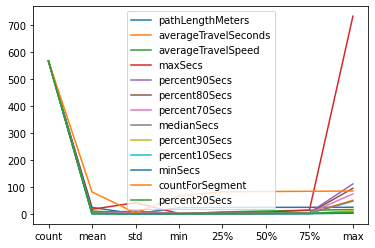

In [35]:
janfebm.describe().plot()

<AxesSubplot:>

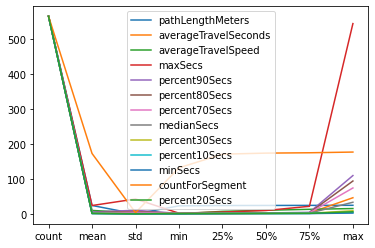

In [36]:
janfebt.describe().plot()

In [37]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '1',
    'startDate': '04-25-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '05-24-2022',
    'endTime' : '09:00',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '1',
    'startDate': '04-25-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '05-24-2022',
    'endTime' : '09:00',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [38]:
janfebweek = concat_frames(requests.get(URL, params = params, headers = headers), requests.get(URL, params = params1, headers = headers))

In [39]:
janfebweek

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
0,"LINESTRING (-86.83200 36.15252, -86.83173 36.1...",CHA39AEF,Charlotte Ave & 39th Ave N Eb,CXISYLHE,37th Ave/Sylvan Heights Station Inbound,24.375,2.875878,8.475672,32.762,5.892,4.067,3.066,1.7605,1.589,1.462,1.254,254,1.517
1,"LINESTRING (-86.86416 36.14888, -86.86390 36.1...",CHABALEF,Charlotte Ave & Balmy Ave Eb,CHALELEM,Charlotte Pike & Lellyett St Eb,23.507,1.508344,15.584641,5.337,1.690,1.592,1.536,1.4500,1.366,1.251,0.969,244,1.315
2,"LINESTRING (-86.79194 36.16148, -86.79169 36.1...",CXI17AVE,17th Ave Station Inbound,CXINGULC,11th Ave / N Gulch Station Inbound,24.691,2.395816,10.305883,5.667,3.091,2.735,2.487,2.2410,2.074,1.857,1.348,239,1.939
3,"LINESTRING (-86.84193 36.15216, -86.84166 36.1...",CXIRICHL,46th Ave/Richland Park Station Inbound,CXISYLPA,42nd Ave/Sylvan Park Station Inbound,24.527,2.746453,8.930428,20.947,4.175,3.497,2.883,2.3055,2.031,1.756,1.429,254,1.868
4,"LINESTRING (-86.87277 36.14445, -86.87258 36.1...",PREWILNN,Premier Dr & Wilclay Dr Nb,CXIAMERI,American Station Inbound,24.433,4.278065,5.711227,10.482,6.948,5.643,4.618,3.5205,3.194,2.524,1.779,246,2.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.584895,9.540813,6.928,3.680,3.183,2.906,2.3540,2.073,1.817,1.181,248,1.945
562,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,1.983143,12.183186,10.811,2.598,2.119,1.932,1.7640,1.630,1.469,1.149,252,1.562
563,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,6.758728,3.590912,84.840,18.632,9.500,4.200,2.0445,1.850,1.614,1.184,254,1.705
564,"LINESTRING (-86.83597 36.15238, -86.83570 36.1...",CXISYLPA,42nd Ave/Sylvan Park Station Inbound,CHA39AEF,Charlotte Ave & 39th Ave N Eb,23.766,3.865539,6.148172,19.206,6.224,5.154,4.454,3.3900,2.661,2.065,1.223,254,2.375


<AxesSubplot:>

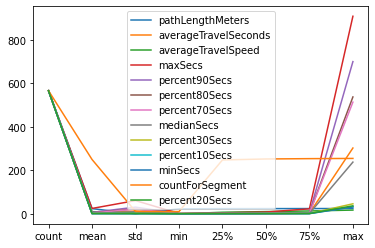

In [40]:
janfebweek.describe().plot()

In [41]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '1',
    'startDate': '02-25-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,5',
    'endDate' : '03-26-2022',
    'endTime' : '09:00',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '1',
    'startDate': '02-25-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,5',
    'endDate' : '03-26-2022',
    'endTime' : '09:00',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [42]:
febmarm = concat_frames(requests.get(URL, params = params, headers = headers), requests.get(URL, params = params1, headers = headers))

In [43]:
febmarm = febmarm[febmarm['countForSegment'] > 40]

febmarm

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
0,"LINESTRING (-86.83200 36.15252, -86.83173 36.1...",CHA39AEF,Charlotte Ave & 39th Ave N Eb,CXISYLHE,37th Ave/Sylvan Heights Station Inbound,24.375,2.453259,9.935763,7.836,5.515,2.980,2.056,1.7230,1.571,1.453,1.273,81,1.500
1,"LINESTRING (-86.86416 36.14888, -86.86390 36.1...",CHABALEF,Charlotte Ave & Balmy Ave Eb,CHALELEM,Charlotte Pike & Lellyett St Eb,23.507,1.548089,15.184528,7.156,1.729,1.671,1.576,1.4510,1.357,1.225,1.006,79,1.312
2,"LINESTRING (-86.79194 36.16148, -86.79169 36.1...",CXI17AVE,17th Ave Station Inbound,CXINGULC,11th Ave / N Gulch Station Inbound,24.691,2.210000,11.172398,3.425,2.845,2.579,2.312,2.1500,1.907,1.731,1.446,79,1.807
3,"LINESTRING (-86.84193 36.15216, -86.84166 36.1...",CXIRICHL,46th Ave/Richland Park Station Inbound,CXISYLPA,42nd Ave/Sylvan Park Station Inbound,24.527,2.768756,8.858491,8.830,4.713,3.537,2.867,2.2880,2.034,1.780,1.350,82,1.925
4,"LINESTRING (-86.87277 36.14445, -86.87258 36.1...",PREWILNN,Premier Dr & Wilclay Dr Nb,CXIAMERI,American Station Inbound,24.433,4.256667,5.739937,22.778,6.464,5.227,4.117,3.3950,3.122,2.586,1.577,81,2.993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.735338,9.016070,5.381,3.858,3.466,3.055,2.5905,2.190,1.726,0.921,80,2.031
563,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,1.916370,12.607691,3.125,2.701,2.251,2.002,1.8630,1.597,1.458,1.221,81,1.557
564,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,7.002451,3.465929,50.733,21.896,10.527,5.286,2.1805,1.820,1.590,1.227,82,1.697
565,"LINESTRING (-86.83597 36.15238, -86.83570 36.1...",CXISYLPA,42nd Ave/Sylvan Park Station Inbound,CHA39AEF,Charlotte Ave & 39th Ave N Eb,23.766,3.856805,6.162095,10.443,6.266,5.287,4.422,3.4565,2.662,2.136,1.819,82,2.440


In [44]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '1',
    'startDate': '02-25-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '2,3,4',
    'endDate' : '03-26-2022',
    'endTime' : '09:00',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '1',
    'startDate': '02-25-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '2,3,4',
    'endDate' : '03-26-2022',
    'endTime' : '09:00',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [45]:
febmart = concat_frames(requests.get(URL, params = params, headers = headers), requests.get(URL, params = params1, headers = headers))

In [46]:
febmart = febmart[febmart['countForSegment'] > 40]

febmart

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
0,"LINESTRING (-86.83200 36.15252, -86.83173 36.1...",CHA39AEF,Charlotte Ave & 39th Ave N Eb,CXISYLHE,37th Ave/Sylvan Heights Station Inbound,24.375,2.420822,10.068894,15.501,5.249,2.642,2.017,1.6550,1.532,1.420,1.212,107,1.483
1,"LINESTRING (-86.86416 36.14888, -86.86390 36.1...",CHABALEF,Charlotte Ave & Balmy Ave Eb,CHALELEM,Charlotte Pike & Lellyett St Eb,23.507,1.503538,15.634457,4.579,1.699,1.612,1.534,1.4420,1.349,1.204,1.033,104,1.294
2,"LINESTRING (-86.79194 36.16148, -86.79169 36.1...",CXI17AVE,17th Ave Station Inbound,CXINGULC,11th Ave / N Gulch Station Inbound,24.691,2.387240,10.342906,6.581,3.237,2.800,2.552,2.1580,1.971,1.703,1.489,100,1.863
3,"LINESTRING (-86.84193 36.15216, -86.84166 36.1...",CXIRICHL,46th Ave/Richland Park Station Inbound,CXISYLPA,42nd Ave/Sylvan Park Station Inbound,24.527,2.690398,9.116495,5.744,4.138,3.354,2.994,2.4050,2.014,1.799,1.461,108,1.931
4,"LINESTRING (-86.87277 36.14445, -86.87258 36.1...",PREWILNN,Premier Dr & Wilclay Dr Nb,CXIAMERI,American Station Inbound,24.433,4.241925,5.759885,9.176,6.276,5.454,4.829,3.7235,3.240,2.627,2.081,106,3.028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.663236,9.260163,10.627,3.884,3.238,2.784,2.3630,2.061,1.786,1.417,106,1.979
563,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,2.048771,11.792924,6.393,2.779,2.330,2.008,1.7680,1.632,1.445,1.215,105,1.555
564,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,7.768701,3.124074,34.601,23.020,14.307,8.753,2.3830,1.950,1.709,1.367,107,1.790
565,"LINESTRING (-86.83597 36.15238, -86.83570 36.1...",CXISYLPA,42nd Ave/Sylvan Park Station Inbound,CHA39AEF,Charlotte Ave & 39th Ave N Eb,23.766,3.884617,6.117978,9.010,5.678,4.963,4.407,3.6070,2.903,2.279,1.612,107,2.688


In [47]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '1',
    'startDate': '03-27-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,5',
    'endDate' : '04-26-2022',
    'endTime' : '09:00',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '1',
    'startDate': '03-27-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,5',
    'endDate' : '04-26-2022',
    'endTime' : '09:00',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

maraprm = concat_frames(requests.get(URL, params = params, headers = headers), requests.get(URL, params = params1, headers = headers))

maraprm = maraprm[maraprm['countForSegment'] > 40]

maraprm

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
0,"LINESTRING (-86.83200 36.15252, -86.83173 36.1...",CHA39AEF,Charlotte Ave & 39th Ave N Eb,CXISYLHE,37th Ave/Sylvan Heights Station Inbound,24.375,2.860362,8.521649,8.334,6.112,4.568,3.401,1.7790,1.546,1.414,0.879,94,1.477
1,"LINESTRING (-86.86416 36.14888, -86.86390 36.1...",CHABALEF,Charlotte Ave & Balmy Ave Eb,CHALELEM,Charlotte Pike & Lellyett St Eb,23.507,1.481685,15.865046,2.306,1.743,1.658,1.569,1.4715,1.375,1.250,0.910,92,1.285
2,"LINESTRING (-86.79194 36.16148, -86.79169 36.1...",CXI17AVE,17th Ave Station Inbound,CXINGULC,11th Ave / N Gulch Station Inbound,24.691,2.328163,10.605357,3.649,3.052,2.684,2.490,2.2415,2.045,1.788,1.561,92,1.952
3,"LINESTRING (-86.84193 36.15216, -86.84166 36.1...",CXIRICHL,46th Ave/Richland Park Station Inbound,CXISYLPA,42nd Ave/Sylvan Park Station Inbound,24.527,2.578862,9.510784,5.935,4.370,3.077,2.709,2.1715,1.930,1.779,1.477,94,1.857
4,"LINESTRING (-86.87277 36.14445, -86.87258 36.1...",PREWILNN,Premier Dr & Wilclay Dr Nb,CXIAMERI,American Station Inbound,24.433,4.309309,5.669819,10.632,6.564,5.983,4.694,3.7760,3.190,2.561,2.066,94,2.972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.660585,9.269390,6.021,3.845,3.254,2.830,2.4120,2.140,1.851,1.564,94,2.032
562,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,2.045175,11.813659,5.049,3.238,2.232,2.003,1.8020,1.662,1.495,1.325,97,1.599
563,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,6.508452,3.728997,41.366,20.769,10.381,3.840,2.0650,1.773,1.638,1.151,93,1.719
564,"LINESTRING (-86.83597 36.15238, -86.83570 36.1...",CXISYLPA,42nd Ave/Sylvan Park Station Inbound,CHA39AEF,Charlotte Ave & 39th Ave N Eb,23.766,4.104532,5.790185,11.045,6.299,5.373,4.661,3.6440,2.922,2.296,1.906,94,2.511


In [48]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '1',
    'startDate': '03-27-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '2,3,4',
    'endDate' : '04-26-2022',
    'endTime' : '09:00',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '1',
    'startDate': '03-27-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '2,3,4',
    'endDate' : '04-26-2022',
    'endTime' : '09:00',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

maraprt = concat_frames(requests.get(URL, params = params, headers = headers), requests.get(URL, params = params1, headers = headers))

maraprt = maraprt[maraprt['countForSegment'] > 40]

maraprt

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
0,"LINESTRING (-86.83200 36.15252, -86.83173 36.1...",CHA39AEF,Charlotte Ave & 39th Ave N Eb,CXISYLHE,37th Ave/Sylvan Heights Station Inbound,24.375,2.540443,9.594783,8.657,5.084,3.465,2.531,1.7190,1.559,1.452,1.281,140,1.501
1,"LINESTRING (-86.86416 36.14888, -86.86390 36.1...",CHABALEF,Charlotte Ave & Balmy Ave Eb,CHALELEM,Charlotte Pike & Lellyett St Eb,23.507,1.544832,15.216541,5.540,1.714,1.631,1.575,1.4820,1.407,1.268,1.137,137,1.352
2,"LINESTRING (-86.79194 36.16148, -86.79169 36.1...",CXI17AVE,17th Ave Station Inbound,CXINGULC,11th Ave / N Gulch Station Inbound,24.691,2.405878,10.262781,4.833,3.194,2.773,2.488,2.2360,2.051,1.837,1.484,139,1.946
3,"LINESTRING (-86.84193 36.15216, -86.84166 36.1...",CXIRICHL,46th Ave/Richland Park Station Inbound,CXISYLPA,42nd Ave/Sylvan Park Station Inbound,24.527,2.709243,9.053082,20.947,3.866,3.250,2.781,2.2740,2.032,1.699,1.401,140,1.895
4,"LINESTRING (-86.87277 36.14445, -86.87258 36.1...",PREWILNN,Premier Dr & Wilclay Dr Nb,CXIAMERI,American Station Inbound,24.433,5.079784,4.809850,40.488,8.170,5.760,5.015,3.6890,3.240,2.649,1.933,139,3.061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.894568,8.520097,8.896,4.165,3.634,3.202,2.5750,2.181,1.891,1.555,139,2.051
563,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,1.944259,12.426842,7.662,2.614,2.109,1.985,1.7560,1.638,1.465,1.269,143,1.565
564,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,8.755993,2.771816,87.073,20.519,12.908,7.500,2.2920,1.882,1.621,1.409,141,1.769
565,"LINESTRING (-86.83597 36.15238, -86.83570 36.1...",CXISYLPA,42nd Ave/Sylvan Park Station Inbound,CHA39AEF,Charlotte Ave & 39th Ave N Eb,23.766,3.987114,5.960702,12.483,6.192,5.208,4.635,3.6055,2.785,2.095,1.695,140,2.566


In [49]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '1',
    'startDate': '04-27-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,5',
    'endDate' : '05-25-2022',
    'endTime' : '09:00',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '1',
    'startDate': '04-27-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,5',
    'endDate' : '05-25-2022',
    'endTime' : '09:00',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

aprmaym = concat_frames(requests.get(URL, params = params, headers = headers), requests.get(URL, params = params1, headers = headers))

aprmaym = aprmaym[aprmaym['countForSegment'] > 40]

aprmaym

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
0,"LINESTRING (-86.83200 36.15252, -86.83173 36.1...",CHA39AEF,Charlotte Ave & 39th Ave N Eb,CXISYLHE,37th Ave/Sylvan Heights Station Inbound,24.375,2.587635,9.419798,7.777,4.837,3.707,2.841,1.7605,1.581,1.501,1.365,96,1.526
1,"LINESTRING (-86.86416 36.14888, -86.86390 36.1...",CHABALEF,Charlotte Ave & Balmy Ave Eb,CHALELEM,Charlotte Pike & Lellyett St Eb,23.507,1.472472,15.964310,2.623,1.647,1.574,1.533,1.4710,1.373,1.269,0.969,89,1.324
2,"LINESTRING (-86.79194 36.16148, -86.79169 36.1...",CXI17AVE,17th Ave Station Inbound,CXINGULC,11th Ave / N Gulch Station Inbound,24.691,2.385169,10.351887,5.321,3.108,2.732,2.445,2.2580,2.018,1.850,1.348,89,1.928
3,"LINESTRING (-86.84193 36.15216, -86.84166 36.1...",CXIRICHL,46th Ave/Richland Park Station Inbound,CXISYLPA,42nd Ave/Sylvan Park Station Inbound,24.527,2.634063,9.311471,6.087,4.057,3.313,2.823,2.2910,2.019,1.764,1.429,96,1.892
4,"LINESTRING (-86.87277 36.14445, -86.87258 36.1...",PREWILNN,Premier Dr & Wilclay Dr Nb,CXIAMERI,American Station Inbound,24.433,4.278380,5.710806,10.482,6.707,5.804,4.737,3.5145,3.248,2.514,1.779,92,3.075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.463352,10.011561,4.195,3.537,2.959,2.686,2.1990,2.035,1.777,1.636,91,1.947
562,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,1.906958,12.669917,5.756,2.574,1.973,1.886,1.7340,1.635,1.459,1.149,95,1.588
563,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,6.462406,3.755567,84.840,19.345,8.044,2.723,2.1050,1.914,1.615,1.184,96,1.711
564,"LINESTRING (-86.83597 36.15238, -86.83570 36.1...",CXISYLPA,42nd Ave/Sylvan Park Station Inbound,CHA39AEF,Charlotte Ave & 39th Ave N Eb,23.766,3.671156,6.473710,7.760,5.478,4.676,4.307,3.3980,2.749,2.149,1.625,96,2.391


In [50]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '1',
    'startDate': '04-27-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '2,3,4',
    'endDate' : '05-25-2022',
    'endTime' : '09:00',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '1',
    'startDate': '04-27-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '2,3,4',
    'endDate' : '05-25-2022',
    'endTime' : '09:00',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

aprmayt = concat_frames(requests.get(URL, params = params, headers = headers), requests.get(URL, params = params1, headers = headers))

aprmayt = aprmayt[aprmayt['countForSegment'] > 40]

aprmayt

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
0,"LINESTRING (-86.83200 36.15252, -86.83173 36.1...",CHA39AEF,Charlotte Ave & 39th Ave N Eb,CXISYLHE,37th Ave/Sylvan Heights Station Inbound,24.375,3.064870,7.953029,32.762,6.166,4.280,3.123,1.8315,1.608,1.411,1.254,146,1.521
1,"LINESTRING (-86.86416 36.14888, -86.86390 36.1...",CHABALEF,Charlotte Ave & Balmy Ave Eb,CHALELEM,Charlotte Pike & Lellyett St Eb,23.507,1.544490,15.219911,5.337,1.723,1.627,1.542,1.4430,1.353,1.225,1.050,143,1.302
2,"LINESTRING (-86.79194 36.16148, -86.79169 36.1...",CXI17AVE,17th Ave Station Inbound,CXINGULC,11th Ave / N Gulch Station Inbound,24.691,2.439927,10.119565,5.667,3.338,2.846,2.504,2.2460,2.088,1.860,1.712,137,1.952
3,"LINESTRING (-86.84193 36.15216, -86.84166 36.1...",CXIRICHL,46th Ave/Richland Park Station Inbound,CXISYLPA,42nd Ave/Sylvan Park Station Inbound,24.527,2.717616,9.025190,6.998,4.261,3.590,2.941,2.3055,2.027,1.744,1.483,146,1.846
4,"LINESTRING (-86.87277 36.14445, -86.87258 36.1...",PREWILNN,Premier Dr & Wilclay Dr Nb,CXIAMERI,American Station Inbound,24.433,4.257782,5.738434,10.020,7.235,5.549,4.622,3.5510,3.151,2.483,1.915,142,2.912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.656792,9.282624,6.928,3.691,3.350,2.984,2.4675,2.072,1.789,1.181,144,1.923
562,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,2.009979,12.020524,10.811,2.686,2.122,1.931,1.7610,1.617,1.464,1.219,143,1.552
563,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,6.993582,3.470325,70.357,17.445,9.567,4.522,2.0365,1.821,1.628,1.398,146,1.704
564,"LINESTRING (-86.88379 36.14136, -86.88404 36.1...",ANNCHAWM,Annex Ave & Charlotte Pike Wb,PREWILNN,Premier Dr & Wilclay Dr Nb,24.837,3.444979,7.209623,7.759,4.489,3.926,3.714,3.3805,3.052,2.459,1.605,144,2.647


In [51]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '1',
    'startDate': '05-26-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,5',
    'endDate' : '06-25-2022',
    'endTime' : '09:00',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '1',
    'startDate': '05-26-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,5',
    'endDate' : '06-25-2022',
    'endTime' : '09:00',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

mayjunm = concat_frames(requests.get(URL, params = params, headers = headers), requests.get(URL, params = params1, headers = headers))

mayjunm = mayjunm[mayjunm['countForSegment'] > 40]

mayjunm

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
0,"LINESTRING (-86.83200 36.15252, -86.83173 36.1...",CHA39AEF,Charlotte Ave & 39th Ave N Eb,CXISYLHE,37th Ave/Sylvan Heights Station Inbound,24.375,2.446581,9.962883,12.290,4.874,3.295,2.319,1.6880,1.546,1.376,1.139,93,1.461
1,"LINESTRING (-86.86416 36.14888, -86.86390 36.1...",CHABALEF,Charlotte Ave & Balmy Ave Eb,CHALELEM,Charlotte Pike & Lellyett St Eb,23.507,1.499435,15.677238,3.807,1.667,1.617,1.541,1.4590,1.385,1.251,1.054,92,1.332
2,"LINESTRING (-86.79194 36.16148, -86.79169 36.1...",CXI17AVE,17th Ave Station Inbound,CXINGULC,11th Ave / N Gulch Station Inbound,24.691,2.330516,10.594649,11.560,2.931,2.661,2.369,2.0800,1.927,1.703,1.389,91,1.836
3,"LINESTRING (-86.84193 36.15216, -86.84166 36.1...",CXIRICHL,46th Ave/Richland Park Station Inbound,CXISYLPA,42nd Ave/Sylvan Park Station Inbound,24.527,2.680415,9.150449,6.017,4.301,3.688,2.866,2.3595,2.055,1.691,1.441,94,1.844
4,"LINESTRING (-86.87277 36.14445, -86.87258 36.1...",PREWILNN,Premier Dr & Wilclay Dr Nb,CXIAMERI,American Station Inbound,24.433,4.402457,5.549855,10.256,6.910,5.918,4.996,3.7785,3.357,2.663,2.095,94,3.072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.574774,9.578316,4.912,3.663,3.289,2.771,2.4410,2.139,1.730,0.971,93,1.949
562,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,2.142947,11.274661,19.906,3.233,2.184,1.959,1.7560,1.596,1.455,1.342,95,1.527
563,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,7.535043,3.220950,98.684,19.851,14.205,5.231,2.0360,1.827,1.589,1.337,94,1.697
564,"LINESTRING (-86.83597 36.15238, -86.83570 36.1...",CXISYLPA,42nd Ave/Sylvan Park Station Inbound,CHA39AEF,Charlotte Ave & 39th Ave N Eb,23.766,3.852894,6.168350,8.821,6.738,5.668,4.639,3.2270,2.619,2.050,1.543,94,2.333


In [52]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '1',
    'startDate': '05-26-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '2,3,4',
    'endDate' : '06-25-2022',
    'endTime' : '09:00',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '1',
    'startDate': '05-26-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '2,3,4',
    'endDate' : '06-25-2022',
    'endTime' : '09:00',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

mayjunt = concat_frames(requests.get(URL, params = params, headers = headers), requests.get(URL, params = params1, headers = headers))

mayjunt = mayjunt[mayjunt['countForSegment'] > 40]

mayjunt

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
0,"LINESTRING (-86.83200 36.15252, -86.83173 36.1...",CHA39AEF,Charlotte Ave & 39th Ave N Eb,CXISYLHE,37th Ave/Sylvan Heights Station Inbound,24.375,2.585533,9.427457,8.497,5.906,3.211,2.412,1.7305,1.583,1.441,1.286,152,1.521
1,"LINESTRING (-86.86416 36.14888, -86.86390 36.1...",CHABALEF,Charlotte Ave & Balmy Ave Eb,CHALELEM,Charlotte Pike & Lellyett St Eb,23.507,1.520140,15.463707,5.910,1.710,1.605,1.540,1.4470,1.381,1.238,1.007,143,1.328
2,"LINESTRING (-86.79194 36.16148, -86.79169 36.1...",CXI17AVE,17th Ave Station Inbound,CXINGULC,11th Ave / N Gulch Station Inbound,24.691,2.469678,9.997660,6.195,3.429,2.953,2.689,2.2810,1.965,1.775,1.417,149,1.905
3,"LINESTRING (-86.84193 36.15216, -86.84166 36.1...",CXIRICHL,46th Ave/Richland Park Station Inbound,CXISYLPA,42nd Ave/Sylvan Park Station Inbound,24.527,2.809716,8.729352,15.635,4.383,3.517,3.081,2.3390,2.038,1.719,1.401,155,1.896
4,"LINESTRING (-86.87277 36.14445, -86.87258 36.1...",PREWILNN,Premier Dr & Wilclay Dr Nb,CXIAMERI,American Station Inbound,24.433,4.462908,5.474682,10.237,7.085,5.733,5.113,3.9060,3.294,2.721,1.747,153,3.082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.677185,9.211915,8.215,3.718,3.342,2.877,2.4030,2.136,1.768,1.515,151,2.029
562,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,1.988000,12.153421,5.661,2.937,2.198,1.969,1.7880,1.668,1.489,0.892,153,1.577
563,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,7.691263,3.155529,94.767,17.975,9.147,3.948,2.1110,1.857,1.602,1.391,156,1.785
564,"LINESTRING (-86.83597 36.15238, -86.83570 36.1...",CXISYLPA,42nd Ave/Sylvan Park Station Inbound,CHA39AEF,Charlotte Ave & 39th Ave N Eb,23.766,3.735781,6.361722,11.217,6.369,4.957,4.419,3.2510,2.605,1.974,1.427,155,2.231


In [53]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '1',
    'startDate': '06-26-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,5',
    'endDate' : '07-26-2022',
    'endTime' : '09:00',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '1',
    'startDate': '06-26-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,5',
    'endDate' : '07-26-2022',
    'endTime' : '09:00',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

junjulm = concat_frames(requests.get(URL, params = params, headers = headers), requests.get(URL, params = params1, headers = headers))

junjulm = junjulm[junjulm['countForSegment'] > 40]

junjulm

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
0,"LINESTRING (-86.83200 36.15252, -86.83173 36.1...",CHA39AEF,Charlotte Ave & 39th Ave N Eb,CXISYLHE,37th Ave/Sylvan Heights Station Inbound,24.375,2.656096,9.177003,7.792,6.409,3.176,2.317,1.7455,1.597,1.463,1.336,94,1.523
1,"LINESTRING (-86.86416 36.14888, -86.86390 36.1...",CHABALEF,Charlotte Ave & Balmy Ave Eb,CHALELEM,Charlotte Pike & Lellyett St Eb,23.507,1.488033,15.797365,3.658,1.656,1.605,1.563,1.4630,1.392,1.290,0.973,92,1.343
2,"LINESTRING (-86.79194 36.16148, -86.79169 36.1...",CXI17AVE,17th Ave Station Inbound,CXINGULC,11th Ave / N Gulch Station Inbound,24.691,2.314473,10.668087,16.466,3.113,2.380,2.163,1.9980,1.856,1.589,0.747,91,1.733
3,"LINESTRING (-86.84193 36.15216, -86.84166 36.1...",CXIRICHL,46th Ave/Richland Park Station Inbound,CXISYLPA,42nd Ave/Sylvan Park Station Inbound,24.527,2.666570,9.197958,5.746,4.265,3.387,3.011,2.3000,2.008,1.701,1.031,93,1.849
4,"LINESTRING (-86.87277 36.14445, -86.87258 36.1...",PREWILNN,Premier Dr & Wilclay Dr Nb,CXIAMERI,American Station Inbound,24.433,4.589948,5.323154,10.358,7.772,6.109,5.520,3.9180,3.426,2.599,1.138,96,3.156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.593041,9.510841,5.703,3.773,3.077,2.812,2.3100,2.084,1.858,1.518,98,1.987
562,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,1.945585,12.418373,4.622,2.782,2.118,1.999,1.7475,1.585,1.445,1.282,94,1.507
563,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,4.974596,4.878788,51.575,16.862,6.860,2.365,1.9545,1.759,1.632,1.315,94,1.699
564,"LINESTRING (-86.83597 36.15238, -86.83570 36.1...",CXISYLPA,42nd Ave/Sylvan Park Station Inbound,CHA39AEF,Charlotte Ave & 39th Ave N Eb,23.766,3.678564,6.460673,9.463,5.926,4.975,4.289,3.2160,2.578,1.989,1.480,94,2.361


In [54]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '1',
    'startDate': '06-26-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '2,3,4',
    'endDate' : '07-26-2022',
    'endTime' : '09:00',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '1',
    'startDate': '06-26-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '2,3,4',
    'endDate' : '07-26-2022',
    'endTime' : '09:00',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

junjult = concat_frames(requests.get(URL, params = params, headers = headers), requests.get(URL, params = params1, headers = headers))

junjult = junjult[junjult['countForSegment'] > 40]

junjult

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
0,"LINESTRING (-86.83200 36.15252, -86.83173 36.1...",CHA39AEF,Charlotte Ave & 39th Ave N Eb,CXISYLHE,37th Ave/Sylvan Heights Station Inbound,24.375,2.661108,9.159718,9.689,6.101,3.987,2.541,1.7870,1.562,1.425,1.279,139,1.501
1,"LINESTRING (-86.86416 36.14888, -86.86390 36.1...",CHABALEF,Charlotte Ave & Balmy Ave Eb,CHALELEM,Charlotte Pike & Lellyett St Eb,23.507,1.563252,15.037243,5.864,1.746,1.654,1.572,1.4810,1.364,1.228,1.055,135,1.318
2,"LINESTRING (-86.79194 36.16148, -86.79169 36.1...",CXI17AVE,17th Ave Station Inbound,CXINGULC,11th Ave / N Gulch Station Inbound,24.691,2.267244,10.890314,5.225,2.977,2.685,2.320,2.0760,1.905,1.712,1.407,135,1.823
3,"LINESTRING (-86.84193 36.15216, -86.84166 36.1...",CXIRICHL,46th Ave/Richland Park Station Inbound,CXISYLPA,42nd Ave/Sylvan Park Station Inbound,24.527,2.610386,9.395928,14.720,3.820,3.241,2.686,2.2795,2.000,1.665,1.392,140,1.862
4,"LINESTRING (-86.87277 36.14445, -86.87258 36.1...",PREWILNN,Premier Dr & Wilclay Dr Nb,CXIAMERI,American Station Inbound,24.433,4.565449,5.351719,23.075,7.404,6.192,4.893,3.7410,3.361,2.588,1.981,138,3.077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.750086,8.967720,8.902,3.715,3.358,3.055,2.5925,2.239,1.904,1.532,140,2.060
562,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,1.959333,12.331237,6.845,2.732,2.135,1.951,1.6920,1.583,1.433,1.295,135,1.525
563,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,7.390371,3.284003,154.866,18.006,8.804,2.680,2.0380,1.802,1.543,1.321,140,1.671
564,"LINESTRING (-86.83597 36.15238, -86.83570 36.1...",CXISYLPA,42nd Ave/Sylvan Park Station Inbound,CHA39AEF,Charlotte Ave & 39th Ave N Eb,23.766,3.779971,6.287350,7.776,5.835,5.374,4.666,3.5280,2.565,1.925,1.543,139,2.299
